In [1]:
# Check that we reach the target depths of g ∼ 27.6, matching the r ∼27.1 and i ∼26.4 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [2]:
names = ['name', 'ra', 'dec', 'MB', 'mm', 'd', 'rv1', 'rv2']
types = ['|U7', float, float, float, float, float, float,float]
gals = np.genfromtxt('gals.dat', dtype=list(zip(names, types)))

In [3]:
ra = np.concatenate([[0], gals['ra']*360/24.])
dec = np.concatenate([[0], gals['dec']])

In [4]:
conn = maf.db.OpsimDatabase('local_gal_bindx2_v2.0_10yrs.db')
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)
name='local_gal'

In [5]:
bundleList = []

for filtername in 'gri':

    # col here could be anything
    metric = maf.metrics.Coaddm5Metric()
    # Select all the visits. Could do something like 'filter="r"' 
    sql = 'filter="%s"' % filtername
    slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
    plotDict = {}
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name, plotDict=plotDict))


Querying database observations with constraint filter="g" for columns ['fieldDec', 'fieldRA', 'rotSkyPos', 'fiveSigmaDepth']
Found 250400 visits
Running:  ['local_gal_CoaddM5_g_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter="r" for columns ['fieldDec', 'fieldRA', 'rotSkyPos', 'fiveSigmaDepth']
Found 464497 visits
Running:  ['local_gal_CoaddM5_r_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter="i" for columns ['fieldDec', 'fieldRA', 'rotSkyPos', 'fiveSigmaDepth']
Found 463191 visits
Running:  ['local_gal_CoaddM5_i_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="g"" constraint now.
Plotting complete.
Plotting figures with "filter="r"" constraint now.
Plotting complete.
Plotting figures with "filter="i

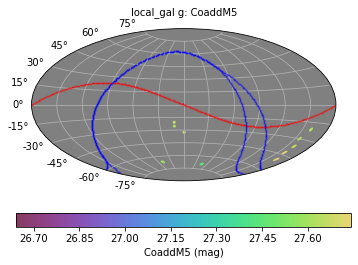

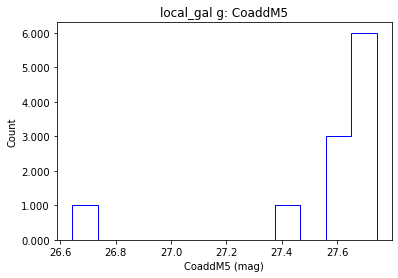

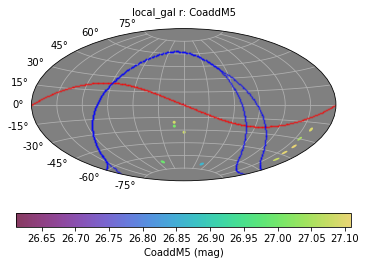

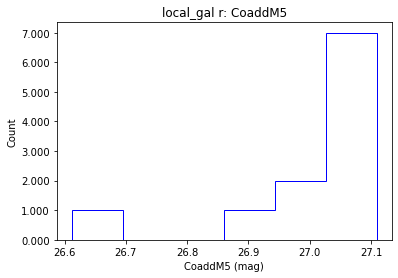

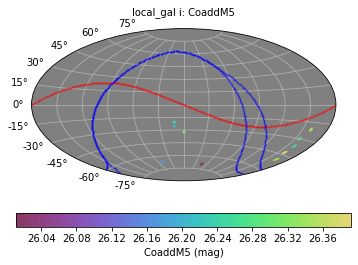

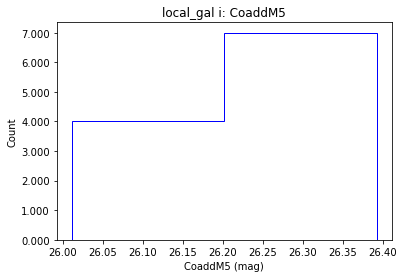

In [6]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)


In [7]:
bundleList[0].metricValues

masked_array(data=[26.6426436586772, 27.67201171795871,
                   27.593548471834023, 27.578172517090476,
                   27.742274925363294, 27.654924504838018,
                   27.66602782716404, 27.734390992923746,
                   27.61895313203789, 27.42554695400743,
                   27.696761861653147],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)

In [8]:
bundleList[1].metricValues

masked_array(data=[26.612494421255754, 27.087340948037152,
                   27.00691603610458, 26.993659926053162,
                   27.07906778974799, 27.09504289944104,
                   27.109059332531178, 27.10405678254206,
                   27.05222616016096, 26.861345399945314,
                   27.081458080631712],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)

In [9]:
bundleList[2].metricValues

masked_array(data=[26.091416894181513, 26.25389385939199,
                   26.198422603395795, 26.171269549199504,
                   26.341829138231642, 26.342013748406327,
                   26.25573152259244, 26.392210405625903,
                   26.277762457061034, 26.01159733577369,
                   26.325053349285522],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)